Matplotlib is building the font cache; this may take a moment.


Data shape: (145, 145, 200)
GT shape: (145, 145)


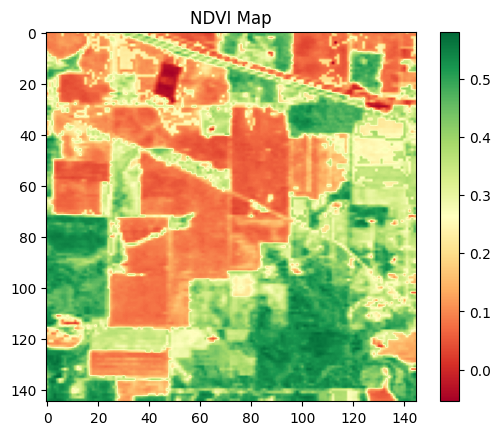

Train Accuracy: 0.9990234375
Test Accuracy: 0.7388617886178862
Model saved to ../models/crop_model.pkl


In [ ]:



import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib


data = sio.loadmat("../data/Indian_pines_corrected.mat")['indian_pines_corrected']
gt = sio.loadmat("../data/Indian_pines_gt.mat")['indian_pines_gt']

print("Data shape:", data.shape) 
print("GT shape:", gt.shape)


red_band = data[:, :, 29].astype(float)
nir_band = data[:, :, 49].astype(float)
ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-6)

plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title("NDVI Map")
plt.savefig("../data/ndvi_map.png")
plt.show()


X = data.reshape(-1, data.shape[2])  
y = gt.reshape(-1)
mask = y > 0  
X = X[mask]
y = y[mask]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)


clf = RandomForestClassifier(n_estimators=20, random_state=42)
clf.fit(X_train, y_train)
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))


joblib.dump(clf, "../models/crop_model.pkl")
print("Model saved to ../models/crop_model.pkl")
